# More on POS (Parts of Speech)

In [74]:
import nltk
from collections import Counter
import pandas as pd

In [3]:
moonstone = open('../Readings/Content/texts/moonstone.md', encoding="utf8").read()


In [4]:
moonstoneTokens = nltk.word_tokenize(moonstone.lower())

In [5]:
moonstoneTagged = nltk.pos_tag(moonstoneTokens)

## Looking for a pattern

"the other _____" 
          
            ^- I know I want the blank to be a noun
          
"the other [NN]"

In [60]:
theOthers = []

for i, wordTagPair in enumerate(moonstoneTagged):
    if i == len(moonstoneTagged) - 3: 
        break
        
    word, tag = wordTagPair
    nextWord, nextTag = moonstoneTagged[i+1]
    nextNextWord, nextNextTag = moonstoneTagged[i+2]
    
    if word == 'the' and nextWord == 'most' and nextNextTag == 'JJ':
        theOthers.append([word, nextWord, nextNextWord])
        
def wordTagSearch(taggedInput, wordOne, wordTwo, tagThree):
    outputList = []
    
    for i, wordTagPair in enumerate(taggedInput):
 
        if i == len(taggedInput) - 3: 
            break
        
        
        word, tag = wordTagPair
        nextWord, nextTag = taggedInput[i+1]
        nextNextWord, nextNextTag = taggedInput[i+2]

        if word == wordOne and nextWord == wordTwo and nextNextTag == tagThree:
            outputList.append([word, nextWord, nextNextWord])
            
        
    return outputList
    
    


In [61]:


#Counter([' '.join(words) for words in theOthers]).most_common(50)

#w = wordTagSearch(moonstoneTagged, 'the', 'other', 'NN')

Counter([' '.join(words) for words in wordTagSearch(moonstoneTagged, 'the', 'other', 'NN')]).most_common(50)

[('the other side', 7),
 ('the other hand', 7),
 ('the other end', 6),
 ('the other way', 3),
 ('the other officer', 2),
 ('the other sex', 2),
 ('the other day', 2),
 ('the other guest', 1),
 ('the other servants–or', 1),
 ('the other woman', 1),
 ('the other point', 1),
 ('the other communication', 1),
 ('the other person', 1),
 ('the other night', 1),
 ('the other case', 1),
 ('the other candle', 1),
 ('the other absorbed', 1),
 ('the other papers–that', 1)]

In [46]:
moonstoneParts = moonstone.split('\n## ')

In [48]:
betteredge = moonstoneParts[1]

In [69]:
narrators = ['clack', 'bruff', 'blake', 'jennings', 'blake2', 'cuff', 'candy', 'betteredge2', 'epilogue']

narratorDict = { narrator: text for narrator, text in zip(narrators, moonstoneParts[3:])}

narratorDict['betteredge'] = betteredge


In [70]:
def findPattern(wordList, text):

    word1, word2, tag3 = wordList

    theOthers = []

    for i, wordTagPair in enumerate(text):
        if i == len(text) - 3: 
            break

        word, tag = wordTagPair
        nextWord, nextTag = text[i+1]
        nextNextWord, nextNextTag = text[i+2]

        if word == word1 and nextWord == word2 and nextNextTag == tag3:
            theOthers.append([word, nextWord, nextNextWord])
            
    return theOthers

In [65]:
findPattern(['the', 'most','JJ'])

[['the', 'most', 'atrocious'],
 ['the', 'most', 'elegant'],
 ['the', 'most', 'horrible'],
 ['the', 'most', 'slovenly'],
 ['the', 'most', 'monstrous'],
 ['the', 'most', 'charming'],
 ['the', 'most', 'accomplished'],
 ['the', 'most', 'inveterate'],
 ['the', 'most', 'unfortunate'],
 ['the', 'most', 'polite'],
 ['the', 'most', 'customary'],
 ['the', 'most', 'comforting'],
 ['the', 'most', 'melancholy'],
 ['the', 'most', 'entire'],
 ['the', 'most', 'painful'],
 ['the', 'most', 'composing'],
 ['the', 'most', 'exasperating'],
 ['the', 'most', 'unendurable'],
 ['the', 'most', 'truly'],
 ['the', 'most', 'ungovernable'],
 ['the', 'most', 'prominent'],
 ['the', 'most', 'amusing'],
 ['the', 'most', 'awful'],
 ['the', 'most', 'rigid'],
 ['the', 'most', 'priceless'],
 ['the', 'most', 'unruffled'],
 ['the', 'most', 'poorly-gifted'],
 ['the', 'most', 'unfaltering'],
 ['the', 'most', 'affectionate'],
 ['the', 'most', 'exasperating'],
 ['the', 'most', 'pardonable'],
 ['the', 'most', 'contemptible'],
 ['

In [72]:
superlativesDict = {}

for narr in narratorDict:
    
    text = narratorDict[narr]
    taggedText = nltk.pos_tag(nltk.word_tokenize(text))
    pats = findPattern(['the', 'most', 'JJ'], taggedText)
    superlativesDict[narr] = pats


In [83]:
narratorLens = { narrator: len(text) for narrator, text in narratorDict.items() }
lengthSeris = pd.Series(narratorLens)

In [75]:
superlativeCounts = {narr: len(pats) for narr, pats in superlativesDict.items() }

In [84]:
superlativiesSeries = pd.Series(superlativeCounts)

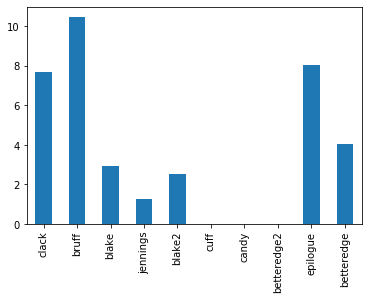

In [87]:
((superlativiesSeries / lengthSeris) * 100000).plot(kind='bar')

In [88]:
def findPattern2(wordList, text):

    tag1, word2, word3 = wordList

    theOthers = []

    for i, wordTagPair in enumerate(text):
        if i == len(text) - 3: 
            break

        word, tag = wordTagPair
        nextWord, nextTag = text[i+1]
        nextNextWord, nextNextTag = text[i+2]

        if tag == tag1 and nextWord == word2 and nextNextWord == word3:
            theOthers.append([word, nextWord, nextNextWord])
            
    return theOthers

In [90]:
findPattern2(['VVD', 'the', 'moonstone'], moonstoneTagged)

# Doesn't work at the moment

[]

# Corpora

A corups us just a collection of text. Corpora are collections of text.

The Brown Corups

In [92]:
from nltk.corpus import brown

In [99]:
#  brown.raw(categories=['fiction'])

fiction = brown.words(categories=['fiction'])

In [100]:
categories = brown.categories()

In [111]:
categoriesDiction = { category: brown.words(categories=[category]) for category in categories }

In [102]:
categoriesDiction

{'adventure': ['Dan', 'Morgan', 'told', 'himself', 'he', 'would', ...],
 'belles_lettres': ['Northern', 'liberals', 'are', 'the', 'chief', ...],
 'editorial': ['Assembly', 'session', 'brought', 'much', 'good', ...],
 'fiction': ['Thirty-three', 'Scotty', 'did', 'not', 'go', 'back', ...],
 'government': ['The', 'Office', 'of', 'Business', 'Economics', '(', ...],
 'hobbies': ['Too', 'often', 'a', 'beginning', 'bodybuilder', ...],
 'humor': ['It', 'was', 'among', 'these', 'that', 'Hinkle', ...],
 'learned': ['1', '.', 'Introduction', 'It', 'has', 'recently', ...],
 'lore': ['In', 'American', 'romance', ',', 'almost', 'nothing', ...],
 'mystery': ['There', 'were', 'thirty-eight', 'patients', 'on', ...],
 'news': ['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...],
 'religion': ['As', 'a', 'result', ',', 'although', 'we', 'still', ...],
 'reviews': ['It', 'is', 'not', 'news', 'that', 'Nathan', ...],
 'romance': ['They', 'neither', 'liked', 'nor', 'disliked', 'the', ...],
 'science_fic

In [122]:
americanDiction = pd.Series({ category: words.count('Space') for category, words in categoriesDiction.items() })

In [131]:
wordCounts = pd.Series({category: len(words) for category, words in categoriesDiction.items() })

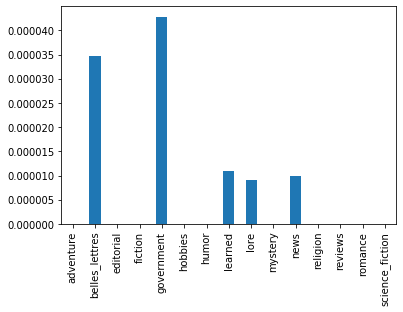

In [123]:
(americanDiction / wordCounts).plot(kind='bar')

In [133]:
catCounters = pd.DataFrame({ cat: Counter(words)  for cat, words in categoriesDiction.items() })

In [137]:
catProportions = catCounters / wordCounts

In [141]:
catProportions['average' ] = catProportions.mean(axis=1)

In [147]:
(catProportions['hobbies'] - catProportions['average']).sort_values(ascending=False).head(30)

is        0.003949
are       0.002825
your      0.002367
or        0.002289
a         0.002253
and       0.002235
for       0.002024
can       0.001867
(         0.001644
)         0.001536
you       0.001531
in        0.001515
will      0.001437
;         0.001355
with      0.001290
be        0.000974
feed      0.000853
have      0.000847
:         0.000844
has       0.000834
used      0.000778
This      0.000717
clay      0.000686
one       0.000658
use       0.000642
may       0.000630
on        0.000620
design    0.000585
water     0.000574
many      0.000554
dtype: float64

In [ ]:
nltk.tokenize.